Question #1 (90 points):
Plot and compare the confusion matrix for the classifiers mentioned in Question #4 and Question #5 of section-II.

['setosa' 'versicolor' 'virginica']


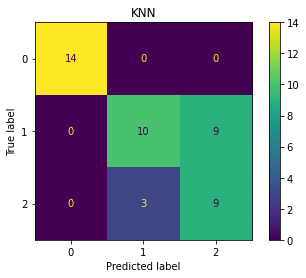

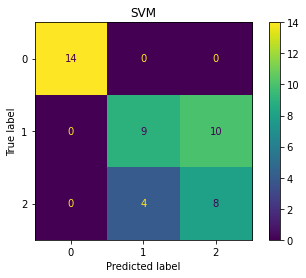

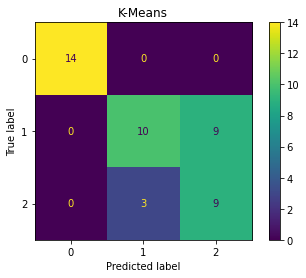

In [114]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
x = iris.data[:, :2]
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

print(iris.target_names)

# KNN
knn = KNeighborsClassifier(n_neighbors=8, weights="distance")
knn.fit(x_train, y_train)
y_pred1 = knn.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)
plt.title("KNN")
plt.show()

# SVM
clf = svm.SVC(kernel="rbf", gamma=0.7, C=1.0)
clf.fit(x_train, y_train)
y_pred2 = clf.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
plt.title("SVM")
plt.show()

# K-Means
kmeans = KMeans(init="k-means++", n_clusters=10)
kmeans.fit(x_train, y_train)
y_pred3 = knn.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred3)
plt.title("K-Means")
plt.show()

In general, through the tests, all three classifiers had fairly saisfactory results, with most of predictions being accurate.<br><br>

Setosa was the label predicted more accurately in all three classifiers, usually with 0 or 1 wrong prediction.<br><br>

Versicolor's predictions vary, sometimes being better in SVM, sometimes in both KNN and K-Means.<br><br>

Virginica had usually the same result in both KNN and K-Means, with SVM having better results.<br><br>

If it wasn't for the variations in versicolor we could conclude that, thanks to its advantage in prediction of virginica, SVM would have a slight, yet better performance.<br><br>

We now turn to the classification reports to analyze further.

In [115]:
print("KNN:", classification_report(y_test, pred1, digits=3), "\n\n",
      "SVM:", classification_report(y_test, pred2, digits=3),  "\n\n",
      "K-Means:", classification_report(y_test, pred3, digits=3))

KNN:               precision    recall  f1-score   support

           0      0.214     0.214     0.214        14
           1      0.524     0.579     0.550        19
           2      0.200     0.167     0.182        12

    accuracy                          0.356        45
   macro avg      0.313     0.320     0.315        45
weighted avg      0.341     0.356     0.347        45
 

 SVM:               precision    recall  f1-score   support

           0      0.167     0.143     0.154        14
           1      0.500     0.368     0.424        19
           2      0.421     0.667     0.516        12

    accuracy                          0.378        45
   macro avg      0.363     0.393     0.365        45
weighted avg      0.375     0.378     0.365        45
 

 K-Means:               precision    recall  f1-score   support

           0      0.333     0.357     0.345        14
           1      0.235     0.211     0.222        19
           2      0.154     0.167     0.160       

In order to find out, I ran the classifiers 10 times and stored its accuracy results to fit them into a Gaussian distribution. This was the result:

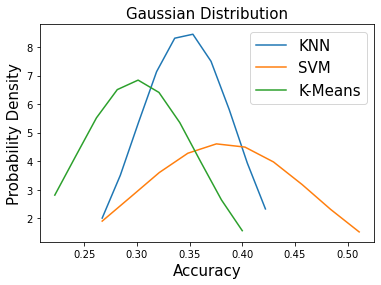

In [121]:
import numpy as np

knn_acc = np.array([0.333, 0.333, 0.267, 0.400, 0.400, 0.289, 0.333, 0.422, 0.333, 0.356])
svm_acc = np.array([0.444, 0.289, 0.333, 0.289, 0.267, 0.511, 0.356, 0.511, 0.444, 0.378])
kme_acc = np.array([0.333, 0.333, 0.289, 0.311, 0.400, 0.244, 0.378, 0.222, 0.244, 0.244])


def gaussian(x, n):
    u = x.mean()
    s = x.std()
    
    x = np.linspace(x.min(), x.max(), n)
    a = ((x-u)**2) / (2*(s**2))
    y = 1 / (s*np.sqrt(2*np.pi))*np.exp(-a)
    
    return x, y, x.mean(), x.std()

x1, y1, u1, s1 = gaussian(knn_acc, 10)
x2, y2, u2, s2 = gaussian(svm_acc, 10)
x3, y3, u3, s3 = gaussian(kme_acc, 10)

plt.plot(x1, y1, label = "KNN")
plt.plot(x2, y2, label = "SVM")
plt.plot(x3, y3, label = "K-Means")
plt.xlabel("Accuracy", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
plt.legend(fontsize=15)
plt.title("Gaussian Distribution", fontsize=15)
plt.show()

In [122]:
print("KNN Accuracy: Mean = %f, variance = %f" % (knn_acc.mean(), knn_acc.var()))
print("SVM Accuracy: Mean = %f, variance = %f" % (svm_acc.mean(), svm_acc.var()))
print("K-Means Accuracy: Mean = %f, variance = %f" % (kme_acc.mean(), kme_acc.var()))

KNN Accuracy: Mean = 0.346600, variance = 0.002187
SVM Accuracy: Mean = 0.382200, variance = 0.007459
K-Means Accuracy: Mean = 0.299800, variance = 0.003400


As shown by the plot and the mean values, SVM has greater accuracy in general, although its skewness/variance is larger, leading to greater variation in results.